In [61]:
# "Sanaz Hosseini"- University of North Carolina at Charlotte
# Introduction to Machine Learning Class - Instructor: Prof. Hamed Tabkhi
# Pytorch & Neural Networks
# Homework 5

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [33]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un= 0.1* t_u

In [34]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [35]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [36]:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [37]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 8,  3,  4,  9,  1,  6,  5, 10,  0]), tensor([7, 2]))

In [38]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [39]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) 
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() 
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

# Training with learning Rate = 0.1 :

In [59]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 2.3191, Validation loss 6.4982
Epoch 1000, Training loss 2.2921, Validation loss 5.9569
Epoch 1500, Training loss 2.2607, Validation loss 5.2958
Epoch 2000, Training loss 2.2307, Validation loss 4.6027
Epoch 2500, Training loss 2.2062, Validation loss 3.9575
Epoch 3000, Training loss 2.1894, Validation loss 3.4200
Epoch 3500, Training loss 2.1801, Validation loss 3.0201
Epoch 4000, Training loss 2.1761, Validation loss 2.7564
Epoch 4500, Training loss 2.1748, Validation loss 2.6048
Epoch 5000, Training loss 2.1746, Validation loss 2.5318


tensor([ 1.4219,  0.3715, -7.8870], requires_grad=True)

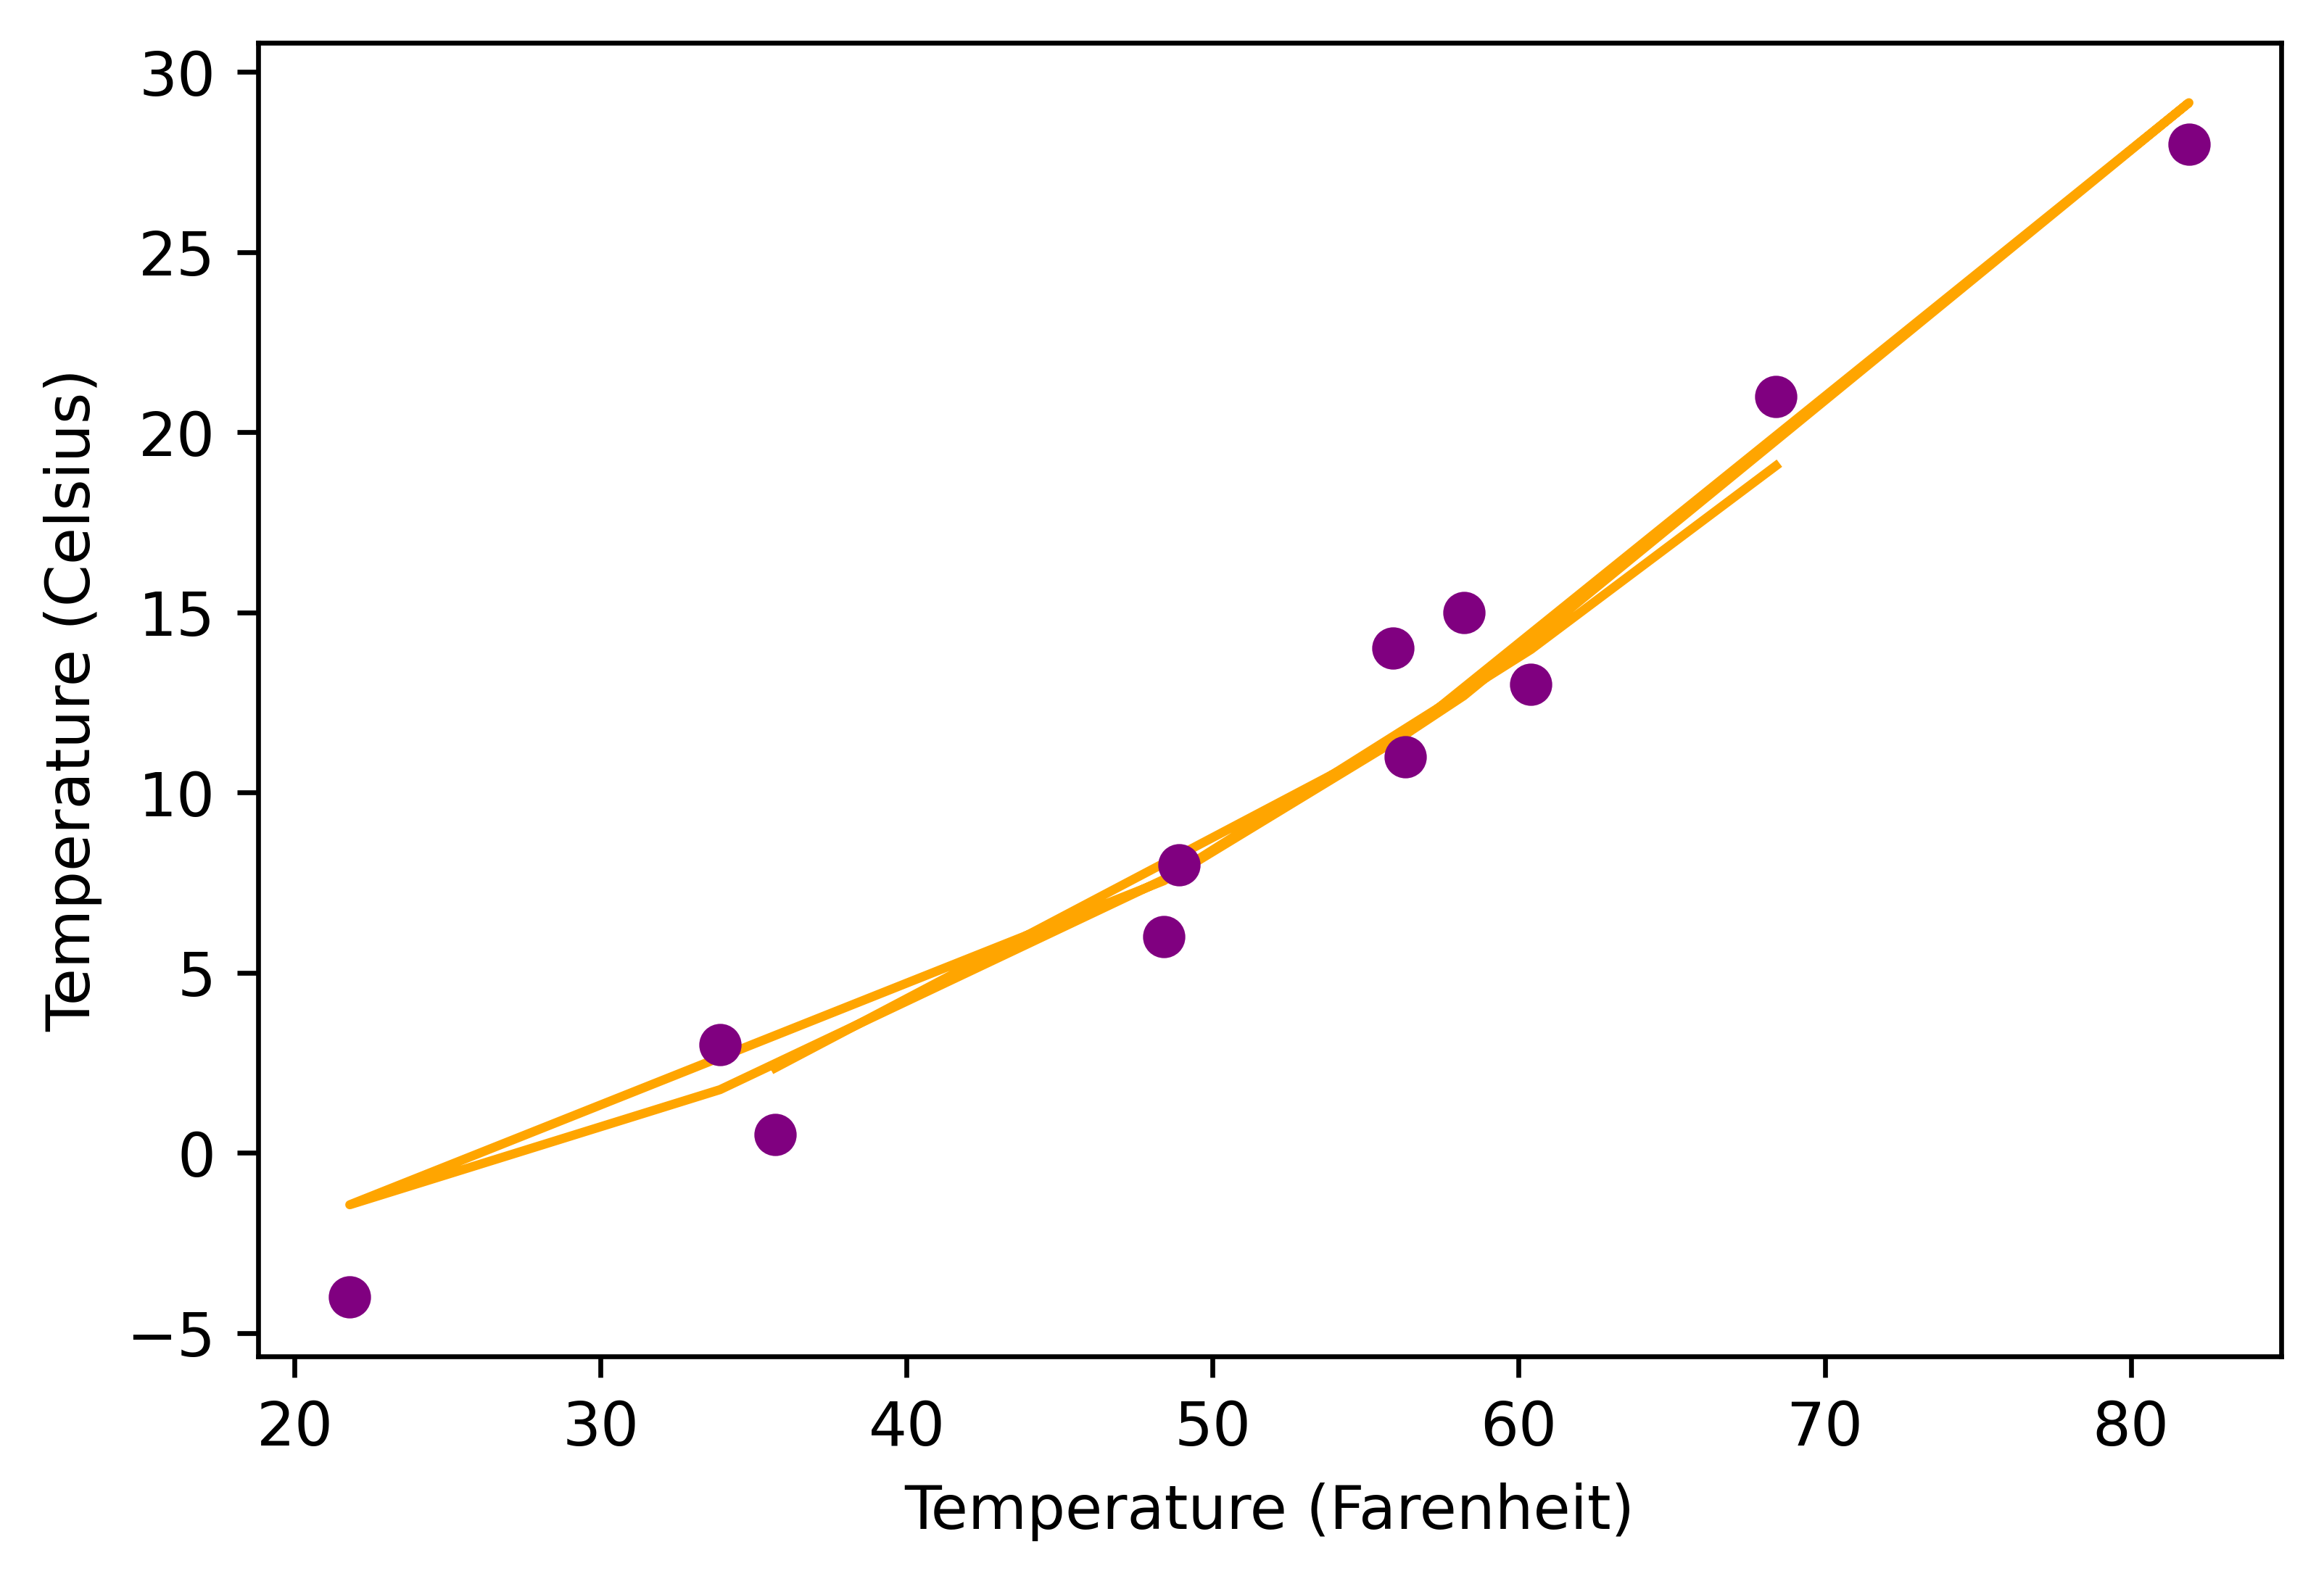

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model(t_un, *params)

fig=plt.figure(dpi=600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), color = 'orange')
plt.plot(t_u.numpy(),t_c.numpy(), 'o', color = 'purple')

# Training with learning Rate = 0.01 :

In [44]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 4.7044, Validation loss 14.8711
Epoch 1000, Training loss 3.1493, Validation loss 10.8136
Epoch 1500, Training loss 2.4972, Validation loss 8.3158
Epoch 2000, Training loss 2.3480, Validation loss 7.1764
Epoch 2500, Training loss 2.3276, Validation loss 6.7456
Epoch 3000, Training loss 2.3224, Validation loss 6.5753
Epoch 3500, Training loss 2.3169, Validation loss 6.4563
Epoch 4000, Training loss 2.3102, Validation loss 6.3220
Epoch 4500, Training loss 2.3019, Validation loss 6.1573
Epoch 5000, Training loss 2.2920, Validation loss 5.9568


tensor([-0.2012,  0.5102, -3.4282], requires_grad=True)

# Training with learning Rate = 0.001 :

In [46]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 112.2803, Validation loss 64.7688
Epoch 1000, Training loss 11.4717, Validation loss 19.4211
Epoch 1500, Training loss 6.0314, Validation loss 17.5499
Epoch 2000, Training loss 5.7578, Validation loss 17.2026
Epoch 2500, Training loss 5.4969, Validation loss 16.6483
Epoch 3000, Training loss 5.1853, Validation loss 15.9655
Epoch 3500, Training loss 4.8273, Validation loss 15.1601
Epoch 4000, Training loss 4.4326, Validation loss 14.2410
Epoch 4500, Training loss 4.0181, Validation loss 13.2303
Epoch 5000, Training loss 3.6074, Validation loss 12.1643


tensor([-0.0037,  0.4306, -1.5042], requires_grad=True)

# Training with learning Rate = 0.0001 :

In [48]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 637.1603, Validation loss 313.1488
Epoch 1000, Training loss 540.9866, Validation loss 267.2989
Epoch 1500, Training loss 455.4551, Validation loss 226.5969
Epoch 2000, Training loss 379.5825, Validation loss 190.5674
Epoch 2500, Training loss 312.5671, Validation loss 158.8226
Epoch 3000, Training loss 253.7513, Validation loss 131.0438
Epoch 3500, Training loss 202.5838, Validation loss 106.9628
Epoch 4000, Training loss 158.5870, Validation loss 86.3467
Epoch 4500, Training loss 121.3265, Validation loss 68.9823
Epoch 5000, Training loss 90.3820, Validation loss 54.6619


tensor([ 0.5699,  0.5718, -0.4324], requires_grad=True)

# The Previous Linear Model: 

In [62]:
def linear_model(t_u, w, b):
    return w * t_u + b

In [63]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [64]:
w = torch.ones(())
b = torch.zeros(())

t_p = linear_model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [65]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [68]:
def linear_training_loop(n_epochs, optimizer, linear_params, train_t_u, val_t_u, train_t_c, val_t_c):
    
    for epoch in range(1, n_epochs + 1):
        train_t_p = linear_model(train_t_u, *linear_params) 
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = linear_model(val_t_u, *linear_params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() 
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return linear_params

In [69]:
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([linear_params], lr=learning_rate)

linear_training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    linear_params = linear_params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 3.1584, Validation loss 2.1082
Epoch 1000, Training loss 2.9374, Validation loss 4.5837
Epoch 1500, Training loss 2.9374, Validation loss 4.6044
Epoch 2000, Training loss 2.9374, Validation loss 4.6045
Epoch 2500, Training loss 2.9374, Validation loss 4.6045
Epoch 3000, Training loss 2.9374, Validation loss 4.6045
Epoch 3500, Training loss 2.9374, Validation loss 4.6045
Epoch 4000, Training loss 2.9374, Validation loss 4.6045
Epoch 4500, Training loss 2.9374, Validation loss 4.6045
Epoch 5000, Training loss 2.9374, Validation loss 4.6045


tensor([  5.6315, -19.0367], requires_grad=True)

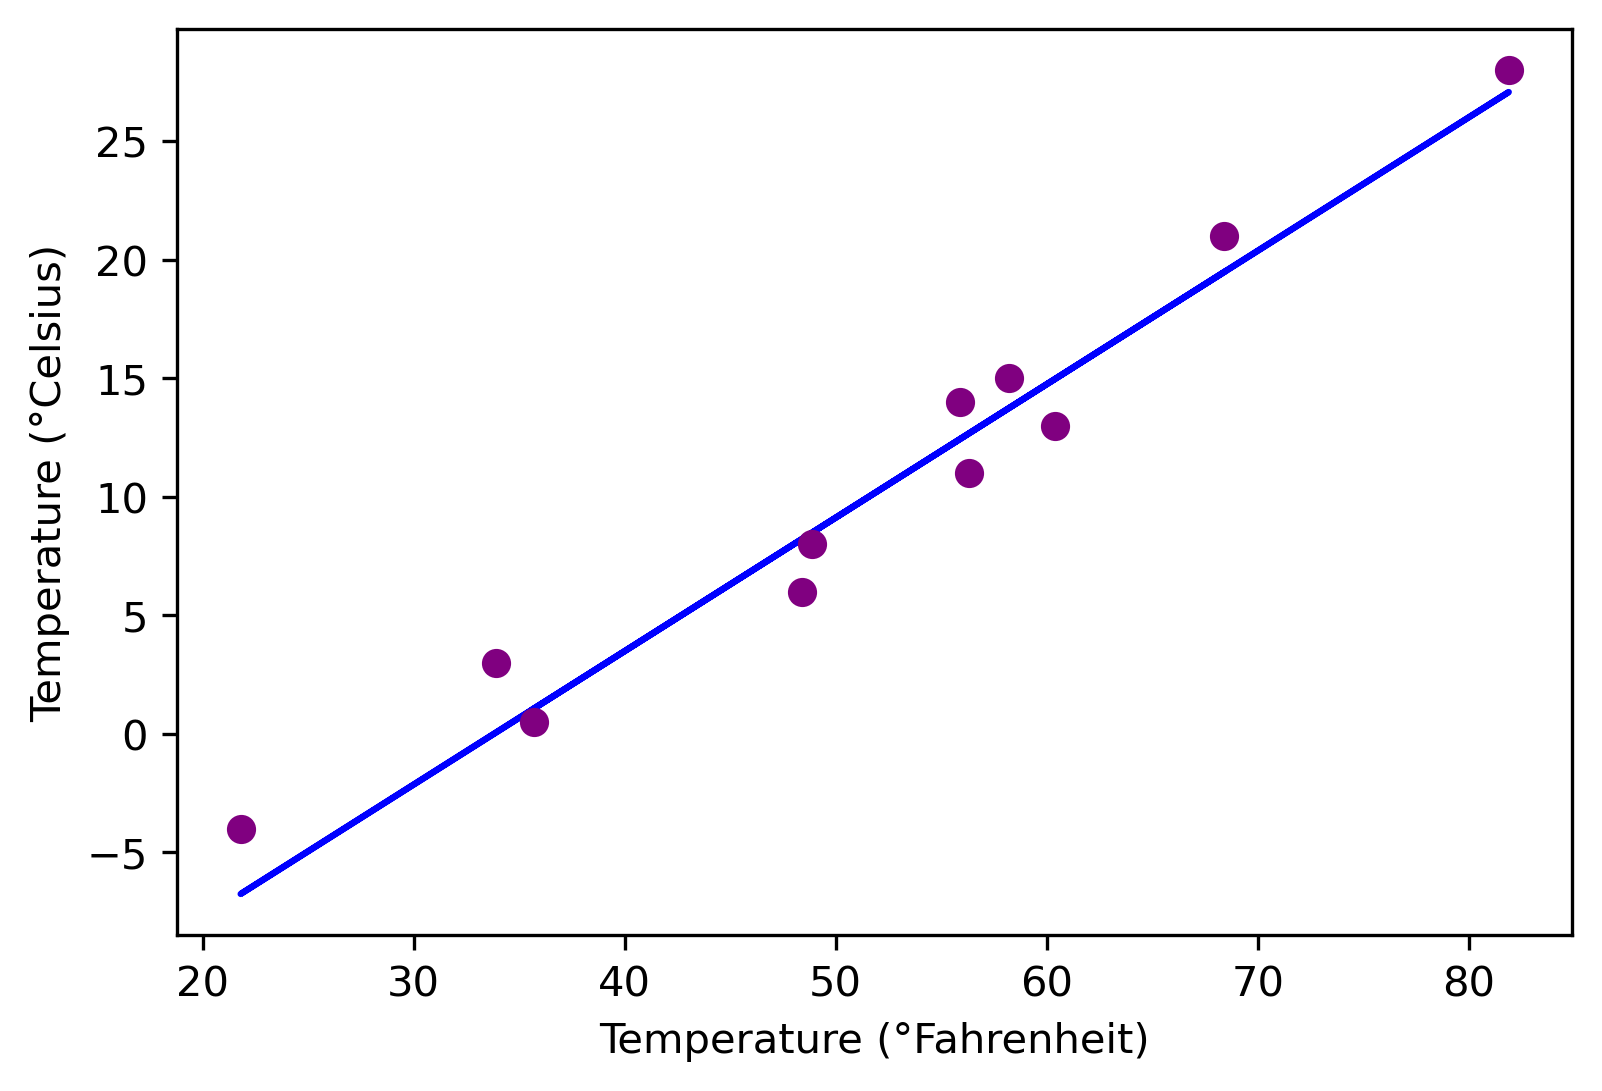

In [56]:
t_p = linear_model(t_un, *linear_params)  

fig = plt.figure(dpi = 300)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), color = 'blue')
plt.plot(t_u.numpy(), t_c.numpy(), 'o', color = 'purple')
plt.savefig("temp_unknown_plot.png", format="png") 

# Both linear model and non-linear model visualizations over the input dataset : 

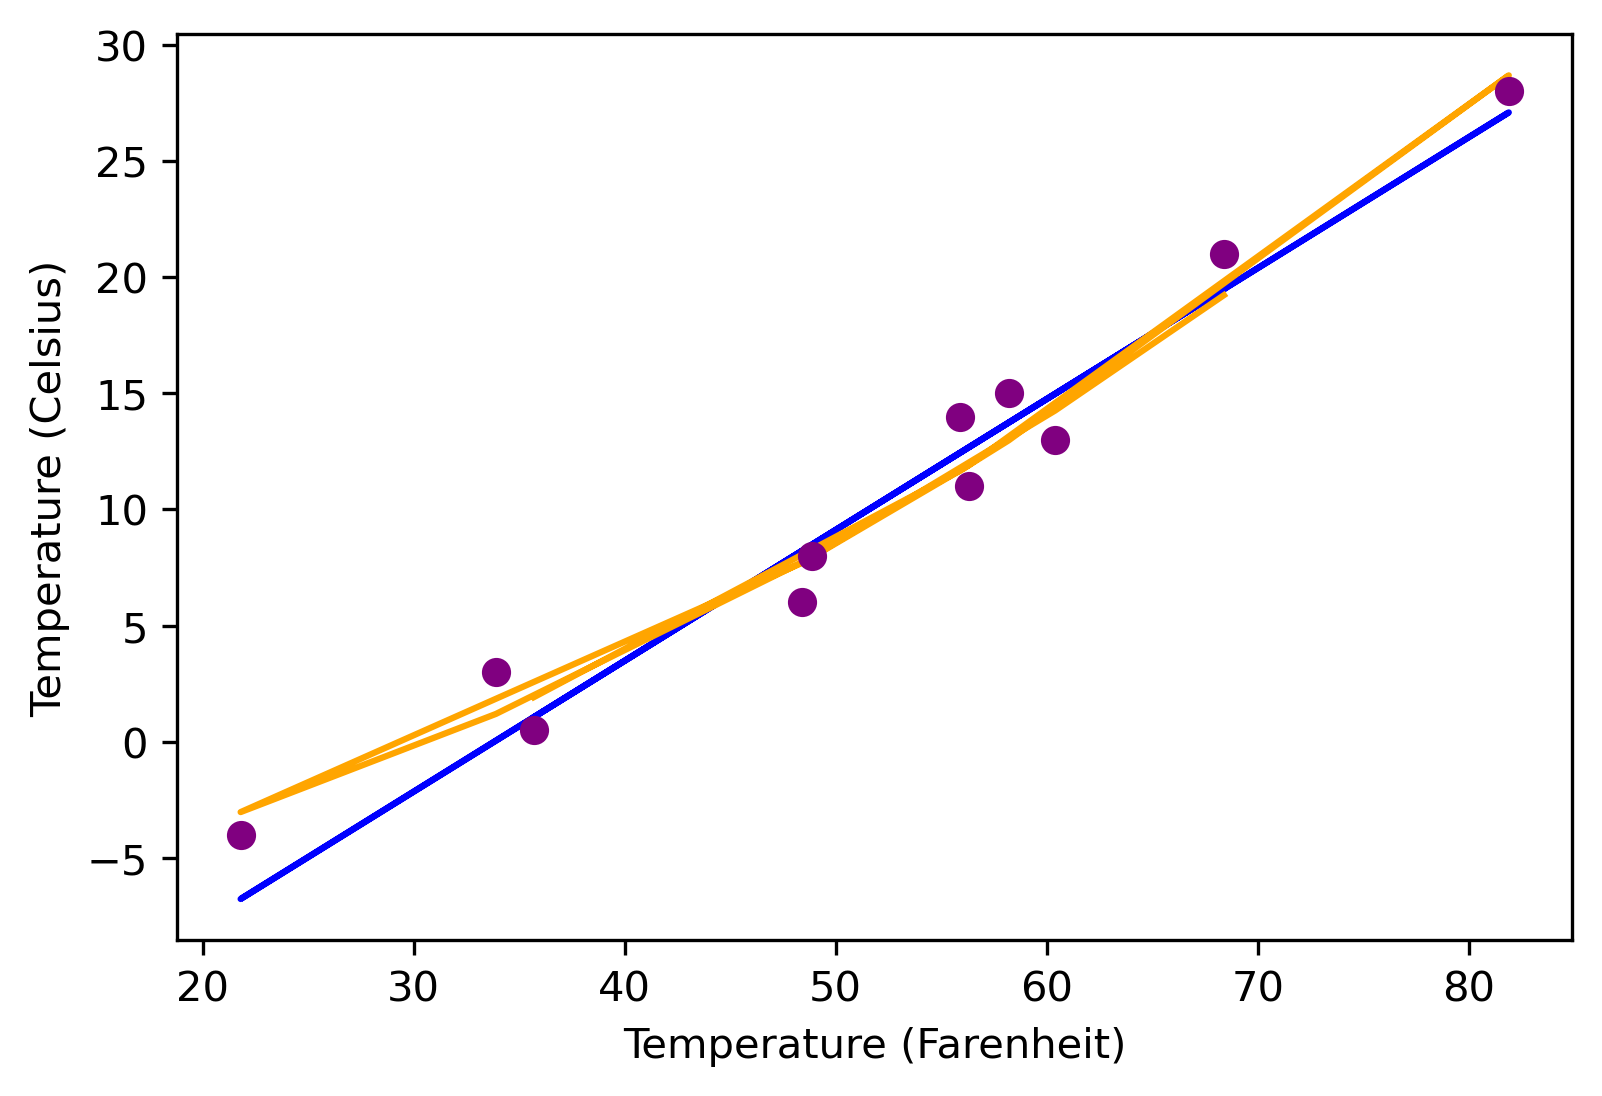

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p= linear_model(t_un, *linear_params)
t_p2= model(t_un, *params)

fig=plt.figure(dpi = 300)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), color = 'blue' )
plt.plot(t_u.numpy(), t_p2.detach().numpy(), color = 'orange')
plt.plot(t_u.numpy(), t_c.numpy(), 'o', color = 'purple')